In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [11]:
# Step 1: Sample FAQ Data
faq_data = {
    "What courses are available?": "You can find a list of courses on our university website.",
    "What are the admission requirements?": "Admission requirements vary by course. Check the admissions page.",
    "How can I contact the admissions office?": "You can email admissions@university.edu or call +123456789."
}

In [12]:
# print(faq_questions)

In [13]:
# Step 2: Vectorize FAQ Questions
faq_questions = list(faq_data.keys())
vectorizer = TfidfVectorizer()
faq_embeddings = vectorizer.fit_transform(faq_questions)

In [14]:
questions = [
    "What courses are available?",
    "What is the fee structure?",
    "How can I apply?",
    "Tell me about research opportunities.",
    "What are the admission requirements?",
    "How can I contact the admissions office?"
]

labels = [1, 0, 0, 0, 1, 1]  # 1 = FAQ, 0 = Non-FAQ


In [15]:
# Vectorize training data
question_embeddings = vectorizer.transform(questions)
classifier = LogisticRegression()
classifier.fit(question_embeddings, labels)

LogisticRegression()

In [16]:
def use_rag_pipeline(question):
    """
    Simulate a call to the RAG pipeline.
    Replace with actual RAG implementation.
    """
    return f"Processing your question using RAG: '{question}'"

In [17]:
# Step 4: Function to Determine Workflow
def classify_and_answer(user_question):
    """
    Classify the question as FAQ or Non-FAQ and generate an answer.
    """
    # Vectorize user question
    user_embedding = vectorizer.transform([user_question])
    
    # Predict if it's an FAQ
    is_faq = classifier.predict(user_embedding)[0]
    
    if is_faq:
        # Match user question with FAQ questions
        similarities = cosine_similarity(user_embedding, faq_embeddings).flatten()
        best_match_idx = np.argmax(similarities)
        best_match_score = similarities[best_match_idx]
        
        # Threshold to ensure high confidence in match
        if best_match_score > 0.7:
            return faq_data[faq_questions[best_match_idx]]
        else:
            return "I couldn't find a matching FAQ. Please provide more details."
    else:
        # Fallback to RAG pipeline
        return use_rag_pipeline(user_question)


In [18]:
# Step 6: Test the System
user_input = "What are the admission requirements?"
response = classify_and_answer(user_input)
print(response)

user_input = "Can you tell me about scholarships?"
response = classify_and_answer(user_input)
print(response)

Admission requirements vary by course. Check the admissions page.
Processing your question using RAG: 'Can you tell me about scholarships?'


In [19]:
user_input = "school requirements for ML course?"
response = classify_and_answer(user_input)
print(response)


I couldn't find a matching FAQ. Please provide more details.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Sample dataset
data = {
    'question': [
        "What is the university's contact number?",
        "Can you summarize the course structure for Artificial Intelligence?",
        "What are the admission requirements?",
        "Explain the differences between supervised and unsupervised learning.",
        "When does the semester start?",
        "How does the RAG pipeline work?"
    ],
    'label': ['simple', 'complex', 'simple', 'complex', 'simple', 'complex']
}

# Convert dataset to DataFrame
df = pd.DataFrame(data)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['question'])

# Encode labels
df['label'] = df['label'].map({'simple': 0, 'complex': 1})

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Function to classify a new question
def classify_question(question):
    question_vector = vectorizer.transform([question])
    prediction = classifier.predict(question_vector)
    return 'simple' if prediction == 0 else 'complex'

# Test the function
new_question = "What are the available courses?"
print(f"The question '{new_question}' is classified as {classify_question(new_question)}.")


In [3]:
import json

with open("data.json", 'r') as file:
    data = json.load(file)

In [8]:
# print(data[0])

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [10]:
# Vectorize FAQ Questions
faq_questions = list(data[0].keys())
vectorizer = TfidfVectorizer()
faq_embeddings = vectorizer.fit_transform(faq_questions)

In [12]:
# print(faq_embeddings)

In [16]:
# import pandas as pd


# df = pd.DataFrame(list(data[0].keys()), columns=['questions'])
# df['answers'] = list(data[0].values())


# # Sort DataFrame by the length of the questions
# df['length'] = df['questions'].apply(len)
# df = df.sort_values('length').drop('length', axis=1)


# df.to_excel('ques.xlsx', index=False)
# df.to_csv('ques.csv', index=False)

In [18]:
import pandas as pd

df = pd.read_excel("ques.xlsx")

# Calculate the length of each question and assign it to the 'length' column
df['length'] = df['questions'].apply(len)

# Save the updated DataFrame back to the Excel file (optional)
df.to_excel('updated_ques.xlsx', index=False)


['What courses are available?', 'What are the admission requirements?', 'How can I contact the admissions office?']


In [ ]:
import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel("ques_dup.xlsx")
# Select the first 50 rows and only the 'questions' and 'answers' columns
subset_df = df.loc[:49, ['questions', 'answers']]
# Convert the subset to a dictionary
questions_answers_dict = subset_df.set_index('questions')['answers'].to_dict()
# Print the resulting dictionary


{'How do I access course materials?': "Course materials are typically accessible via the university's virtual learning environment (VLE), known as Blackboard Learn Ultra", 'How do I access library resources?': "You can access library resources through the university's online library portal.", 'How can I provide course feedback?': 'Course feedback is usually collected via surveys or feedback forms provided by the university at the end of each module', 'How can I access academic support?': 'Academic support is available through tutoring services, study skills workshops, and consultations with your lecturers or academic advisors', 'Can I study part-time in computing?': 'Yes, Ulster University offers part-time study options in computing, though availability may vary by program.', 'What programming languages are taught?': 'Common programming languages include Python, Java, C++, and JavaScript, depending on the course.', 'Are there online courses in computing?': 'Yes, the university offers s

In [30]:
# Vectorize FAQ Questions
faq_questions = list(questions_answers_dict.keys())
vectorizer = TfidfVectorizer()
faq_embeddings = vectorizer.fit_transform(faq_questions)

# print(faq_embeddings)

In [31]:
import time
import numpy as np

# Example list of queries
queries = [
    "What are the symptoms of breast cancer?",
    "Explain the concept of reinforcement learning.",
    "Who won the FIFA World Cup in 2022?",
]

# Simulate the RAG system function
def rag_pipeline(query):
    # Simulate retrieval phase (e.g., search knowledge base)
    time.sleep(0.2)  # Simulating retrieval delay
    # Simulate generation phase (e.g., using a language model)
    time.sleep(0.3)  # Simulating generation delay
    return f"Response to: {query}"

# Measure latency for each query
latencies = []

for query in queries:
    start_time = time.time()
    response = rag_pipeline(query)
    end_time = time.time()
    latency = end_time - start_time
    latencies.append(latency)
    print(f"Query: {query}\nResponse: {response}\nLatency: {latency:.4f} seconds\n")

# Calculate single query latency metrics
mean_latency = np.mean(latencies)
p95_latency = np.percentile(latencies, 95)
p99_latency = np.percentile(latencies, 99)

print(f"Mean Single Query Latency: {mean_latency:.4f} seconds")
print(f"P95 Latency: {p95_latency:.4f} seconds")
print(f"P99 Latency: {p99_latency:.4f} seconds")


Query: What are the symptoms of breast cancer?
Response: Response to: What are the symptoms of breast cancer?
Latency: 0.5006 seconds

Query: Explain the concept of reinforcement learning.
Response: Response to: Explain the concept of reinforcement learning.
Latency: 0.5006 seconds

Query: Who won the FIFA World Cup in 2022?
Response: Response to: Who won the FIFA World Cup in 2022?
Latency: 0.5006 seconds

Mean Single Query Latency: 0.5006 seconds
P95 Latency: 0.5006 seconds
P99 Latency: 0.5006 seconds


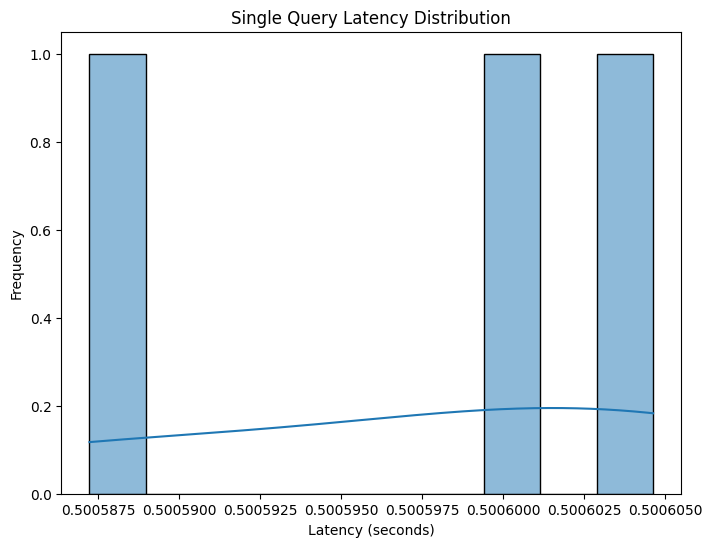

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot latency distribution
plt.figure(figsize=(8, 6))
sns.histplot(latencies, kde=True, bins=10)
plt.title("Single Query Latency Distribution")
plt.xlabel("Latency (seconds)")
plt.ylabel("Frequency")
plt.show()


In [1]:
import numpy as np

# Parameters
grid_size = 5
gamma = 0.1  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate
num_episodes = 1000

grid = np.zeros((5, 5))
grid[-1, -1] = 10  # Goal with a high positive reward
grid[1, 1] = -1  # Obstacle with a negative reward
grid[2, 3] = -1  # Another obstacle

# Action space: up, down, left, right
actions = ['up', 'down', 'left', 'right']
q_table = np.zeros((grid_size, grid_size, len(actions)))

# Define the transition function
def get_next_state(state, action):
    i, j = state
    if action == 'up' and i > 0:
        return (i - 1, j)
    elif action == 'down' and i < grid_size - 1:
        return (i + 1, j)
    elif action == 'left' and j > 0:
        return (i, j - 1)
    elif action == 'right' and j < grid_size - 1:
        return (i, j + 1)
    return state

# Define the reward function
def get_reward(state):
    return grid[state]

# Epsilon-greedy action selection
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return actions[np.argmax(q_table[state[0], state[1], :])]

# Q-learning algorithm
for episode in range(num_episodes):
    state = (0, 0)  # Start at top-left corner
    done = False
    while not done:
        action = choose_action(state)
        next_state = get_next_state(state, action)
        reward = get_reward(next_state)
        action_index = actions.index(action)

        # Update Q-table using Q-learning update rule
        q_table[state[0], state[1], action_index] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1], :]) - q_table[state[0], state[1], action_index])
        
        state = next_state

        # End episode if we reach the goal
        if reward == 10:
            done = True

# Display learned Q-values
print(q_table)

[[[ 9.51473243e-08  7.36086323e-09  9.55558714e-08  1.00000000e-06]
  [ 9.51763306e-07 -9.99999961e-01  9.61610125e-08  1.00000000e-05]
  [ 8.69668443e-06  7.99750030e-07  9.28791824e-07  1.00000000e-04]
  [ 9.77620315e-05  2.95212125e-04  9.71454840e-06  1.00000000e-03]
  [ 9.54904386e-04  1.00000000e-02  9.50787866e-05  9.50418060e-04]]

 [[ 9.37963932e-08  0.00000000e+00  1.73831477e-09 -9.90302263e-01]
  [ 1.00004442e-07  0.00000000e+00  5.40763303e-10  7.13745322e-07]
  [ 9.80287763e-06  0.00000000e+00 -9.72187150e-01  9.89715724e-07]
  [ 9.93927238e-05 -9.65250018e-01  0.00000000e+00  8.33228183e-03]
  [ 8.85555791e-04  1.00000000e-01  4.04409699e-04  9.01186018e-03]]

 [[ 8.55886658e-10  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [-6.51321560e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 9.30204762e-08  0.00000000e+00  0.00000000e+00 -2.71000000e-01]
  [ 6.19299895e-06  7.46065641e-02  0.00000000e+00  0.00000000e+00]
  [ 9.53102125e-03  1.00000000e+00 -9.488394